In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from libs import perceptron, adalineGD, adalineSGD

In [2]:
data = pd.read_csv('datasets/pima-indians-diabetes.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = data.iloc[0:, [1, 2]].values
y = data.iloc[0:, 8].values

X, y

(array([[148,  72],
        [ 85,  66],
        [183,  64],
        ..., 
        [121,  72],
        [126,  60],
        [ 93,  70]]),
 array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 12345)

In [5]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

/home/rodmds/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Perceptron

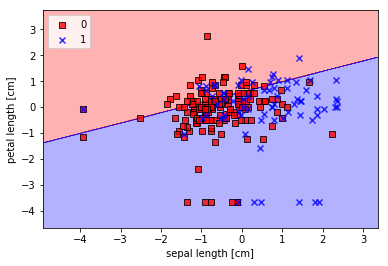

In [6]:
percep = perceptron.Perceptron(eta = 0.1, n_iter = 10)
percep.fit(X_train_std, y_train)

perceptron.plot_decision_regions(X_test_std, y_test, classifier = percep)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Adaline BGD

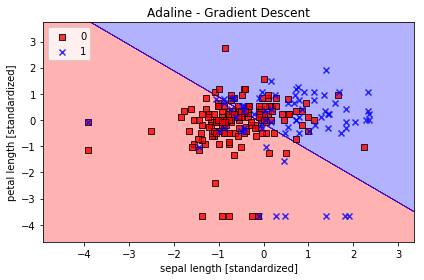

In [7]:
adaGD = adalineGD.AdalineGD(n_iter = 15, eta = 0.01)
adaGD.fit(X_train_std, y_train)

adalineGD.plot_decision_regions(X_test_std, y_test, classifier = adaGD)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Adaline SGD

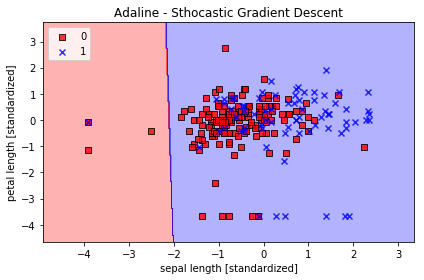

In [8]:
adaSGD = adalineSGD.AdalineSGD(n_iter = 15, eta = 0.01, random_state = 1)
adaSGD.fit(X_train_std, y_train)

adalineSGD.plot_decision_regions(X_test_std, y_test, classifier = adaSGD)
plt.title('Adaline - Sthocastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Use K-Fold Cross Validation Estratificada com k = 3 para obter a acurácia dos 3 algoritmos acima sobre o dataset pima-indians-diabetes.csv. Faça Standardization dos dados (fit para o conjunto de treino e transform para treino e teste).

In [9]:
aux = StratifiedKFold(n_splits = 3, shuffle = True)
aux.get_n_splits();

In [10]:
acc_percep = []
acc_adaGD = []
acc_adaSGD = []
acc_knn = []
acc_nb = []
acc_svm = []

for index_train, index_test in aux.split(X, y):
    X_train, X_test = X[index_train], X[index_test]
    y_train, y_test = y[index_train], y[index_test]
    
    std = preprocessing.StandardScaler().fit(X_train)
    X_train_std = std.transform(X_train)
    X_test_std = std.transform(X_test)
    
    #Perceptron
    model_percep = perceptron.Perceptron(eta = 0.0000001, n_iter = 20)
    model_percep.fit(X_train_std, y_train)
    y_pred_percep = model_percep.predict(X_test_std)
    acc_percep.append(metrics.accuracy_score(y_test, y_pred_percep))
    
    #Adaline com Gradiente Descendente Batch
    model_adaGD = adalineGD.AdalineGD(n_iter = 20, eta = 0.0000001)
    model_adaGD.fit(X_train_std, y_train)
    y_pred_adaGD = model_adaGD.predict(X_test_std)
    acc_adaGD.append(metrics.accuracy_score(y_test, y_pred_adaGD))
    
    #Adaline com Gradiente Descendente Estocástico
    model_adaSGD = adalineSGD.AdalineSGD(n_iter = 20, eta = 0.0000001, random_state = 1)
    model_adaSGD.fit(X_train_std, y_train)
    y_pred_adaSGD = model_adaSGD.predict(X_test_std)
    acc_adaSGD.append(metrics.accuracy_score(y_test, y_pred_adaSGD))
    
    #KNN
    model_knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train_std, y_train)
    y_pred_knn = model_knn.predict(X_test_std)
    acc_knn.append(metrics.accuracy_score(y_test, y_pred_knn))
    
    #Naive Bayes
    model_nb = GaussianNB().fit(X_train_std, y_train)
    y_pred_nb = model_nb.predict(X_test_std)
    acc_nb.append(metrics.accuracy_score(y_test, y_pred_nb))
    
    #SVM
    model_svm = SVC().fit(X_train_std, y_train)
    y_pred_svm = model_svm.predict(X_test_std)
    acc_svm.append(metrics.accuracy_score(y_test, y_pred_svm))
    
    
print(" Accuracy Perceptron: ", np.mean(acc_percep))
print("Accuracy Adaline BGD: ", np.mean(acc_adaGD))
print("Accuracy Adaline SGD: ", np.mean(acc_adaSGD))
print("        Accuracy KNN: ", np.mean(acc_knn))
print("Accuracy Naive Bayes: ", np.mean(acc_nb))
print("        Accuracy SVM: ", np.mean(acc_svm))

/home/rodmds/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


 Accuracy Perceptron:  0.330722371633
Accuracy Adaline BGD:  0.338534990845
Accuracy Adaline SGD:  0.338534990845
        Accuracy KNN:  0.697923700122
Accuracy Naive Bayes:  0.755180298854
        Accuracy SVM:  0.755165059701


# Explique as diferenças entre o Adaline com Gradiente Descendente em Batch e o Adaline com Gradiente Descendente Estocástico.

O Adaline com Gradiente Descendente em Batch minimiza uma função de custo tomando uma etapa na direção oposta a um gradiente de custo calculado a partir de todo o conjunto de treinamento, tornando-o computacionalmente muito caro. O Adaline com Gradiente Descendente Estocástico alcança a convergência muito mais rapidamente devido às atualizações de peso mais frequentes. Cada gradiente é calculado com base em um único exemplo de treinamento.